# Friday Nov 2, 2018
## Context:
From meeting with Michael on Wed 10-31, we noticed the NMR_B samples with the smallest range (plotting NMR_B vs. sample number) is not constant + gaussian noise. It displays a random-walk behavior that looks roughly sinusoidal (potentially with Gaussian noise). First, I recreate this plot, then move through different steps to understand this shape: projection on y axis (histogram of NMR_B for a measurement (50 samples)); simple MC showing histogram from sin + gaussian noise; compare two histograme.

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from hallprobecalib import hpc_ext_path
from hallprobecalib.rawdataframe import RawDataFrame
from hallprobecalib.contour2d import Contour2d
from hallprobecalib.scatter3d import Scatter3d
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
# load data (full dataset used for NMR_B...deleted in cleaned dataset)
file0 = "datafiles/2018-10-03 125726"
df,meta = RawDataFrame(file0+'_full',frompickle=True)

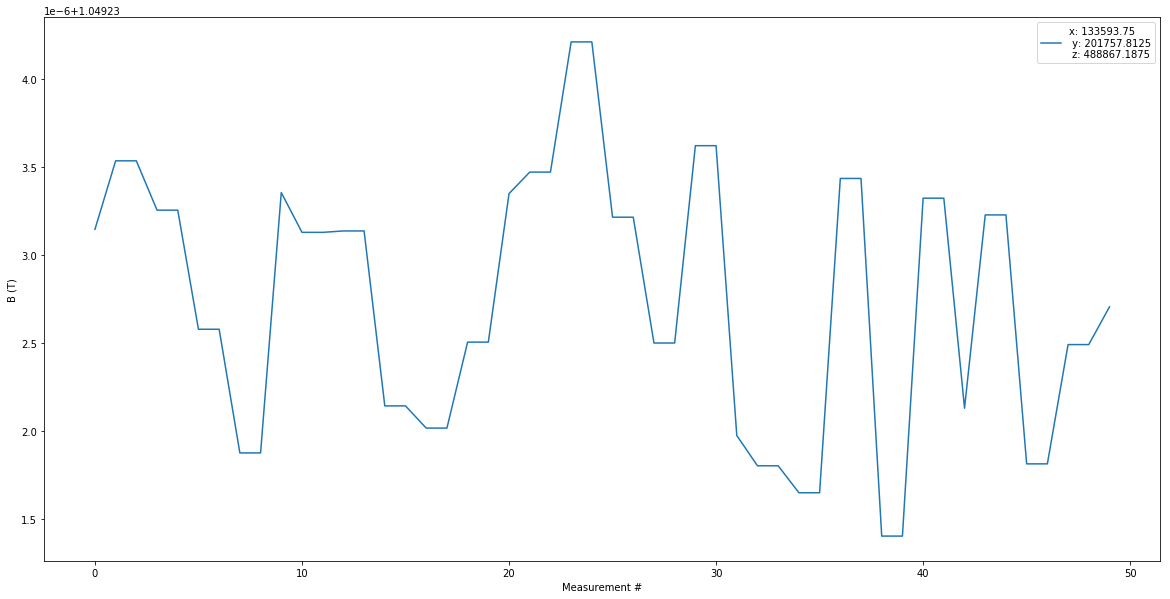

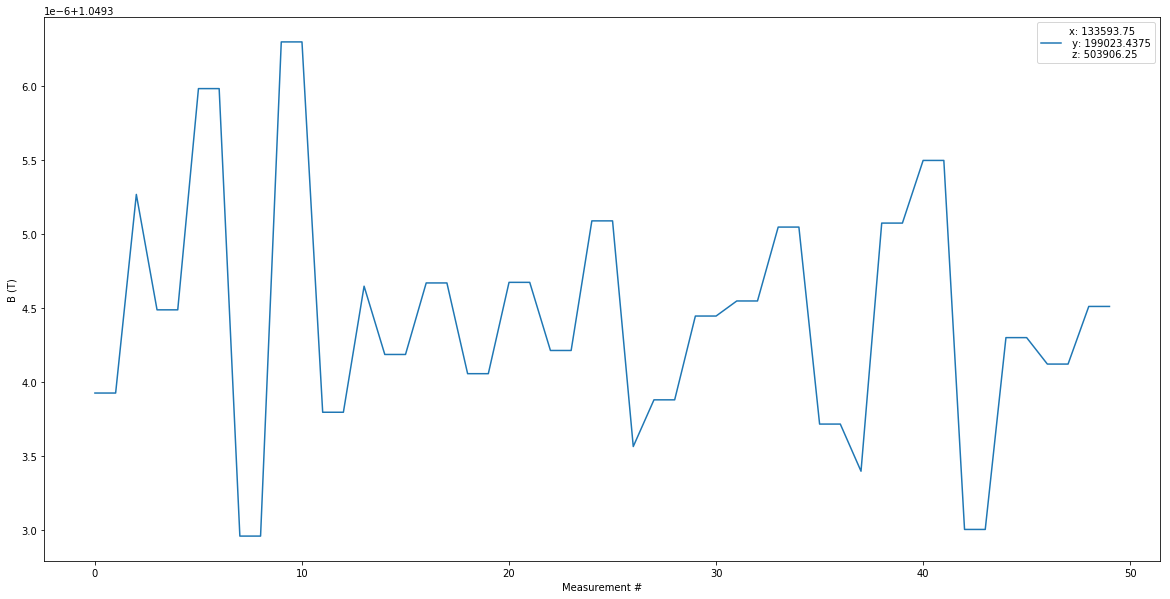

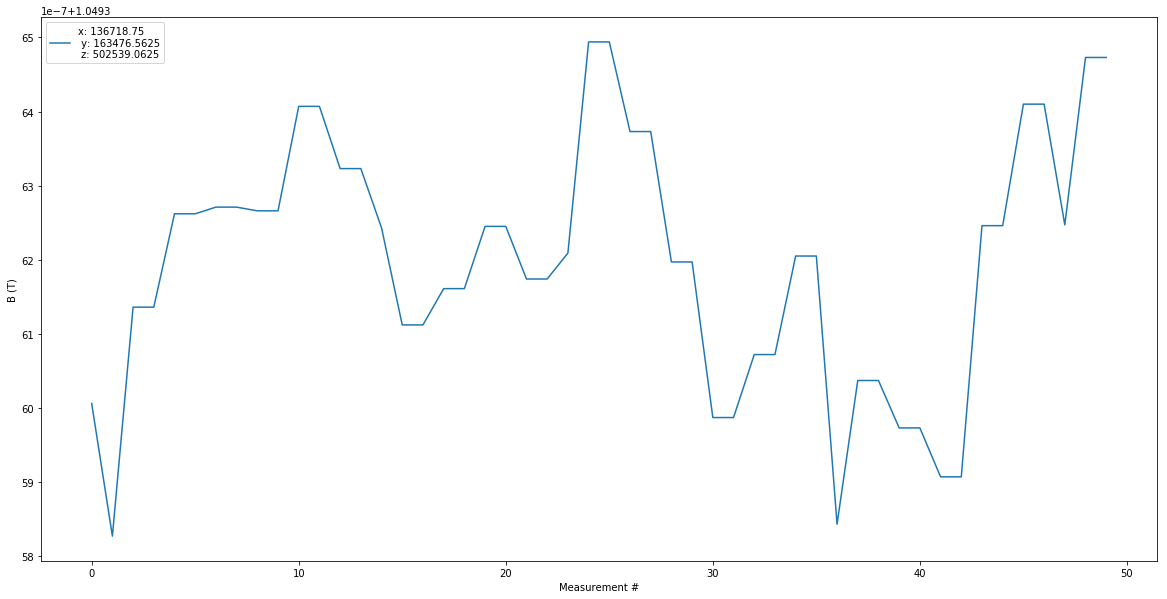

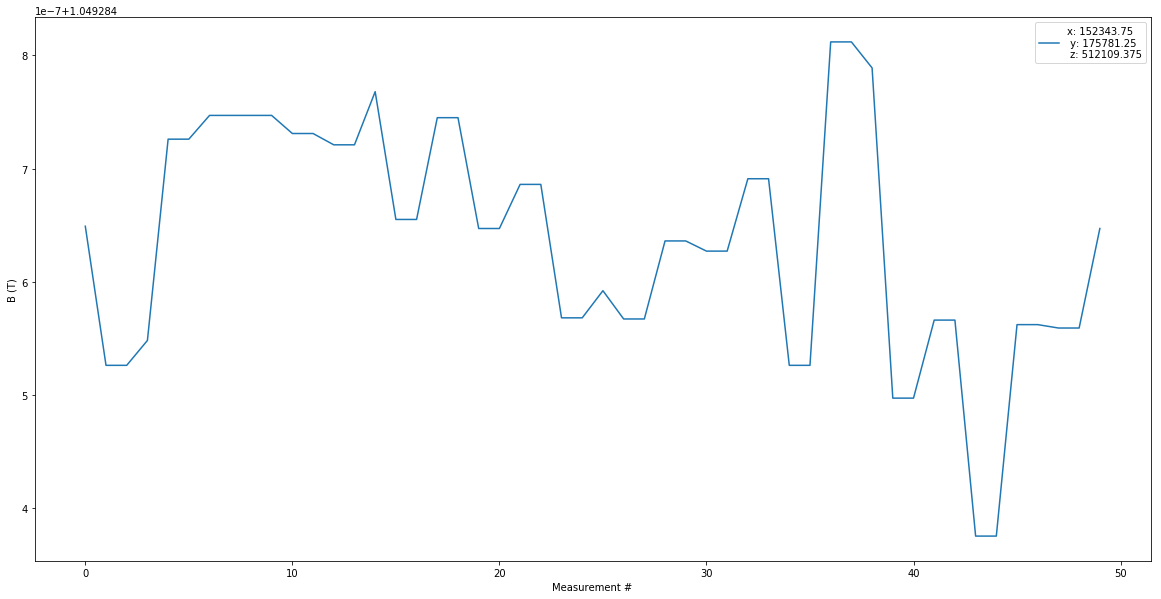

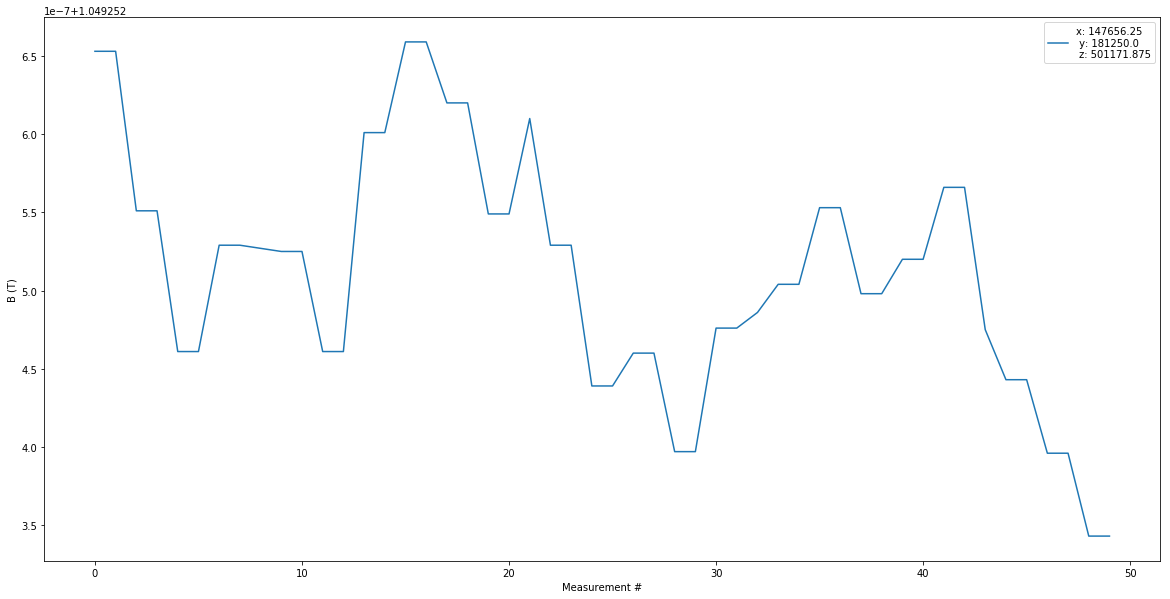

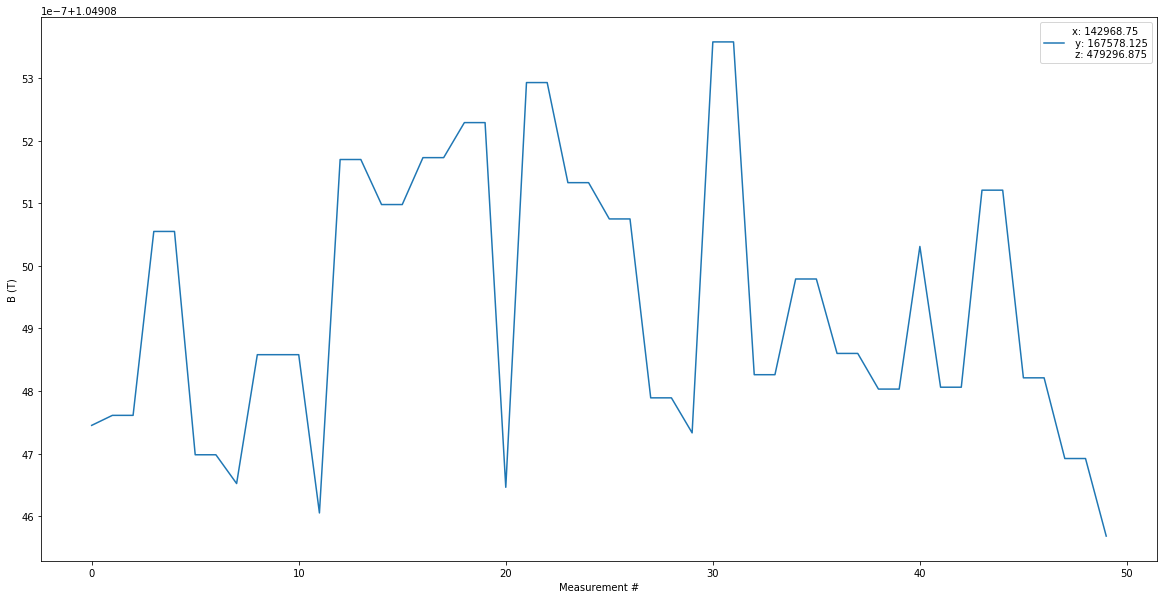

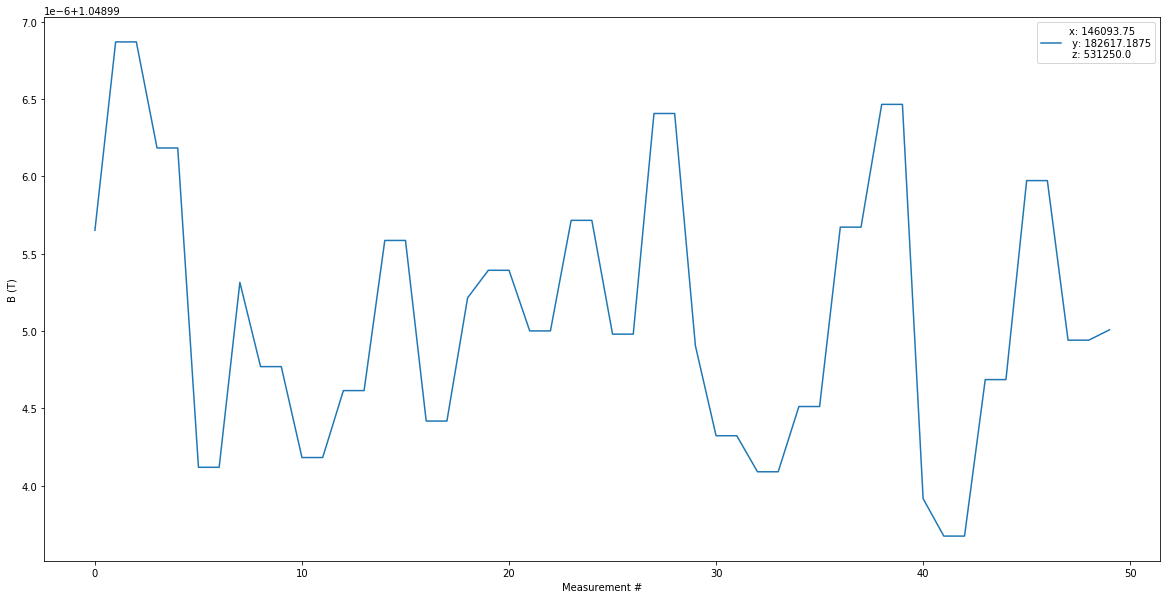

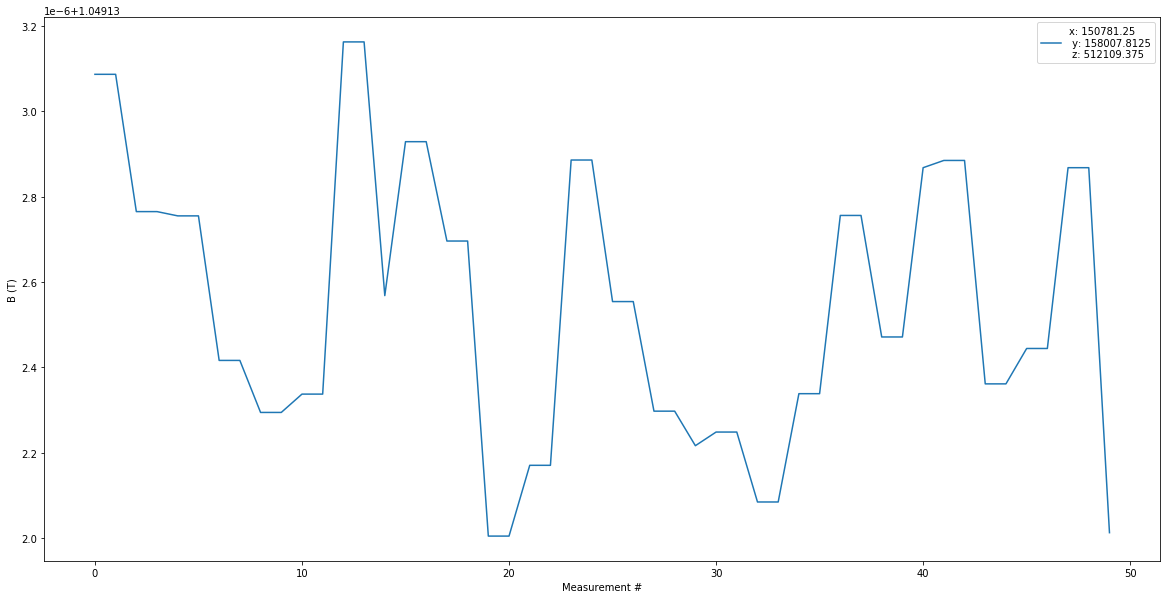

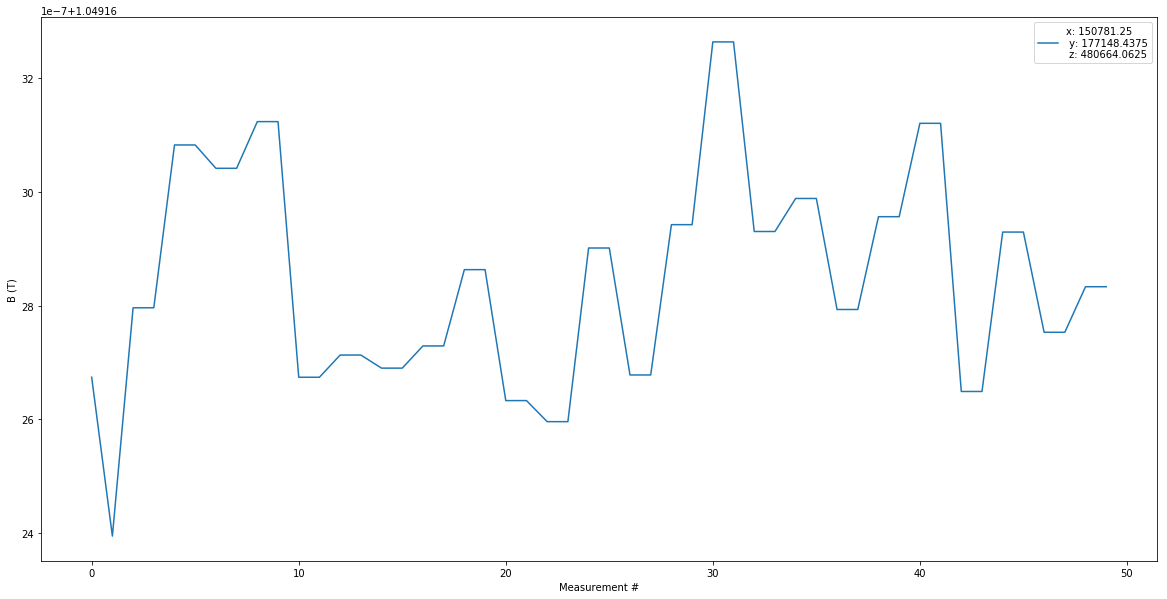

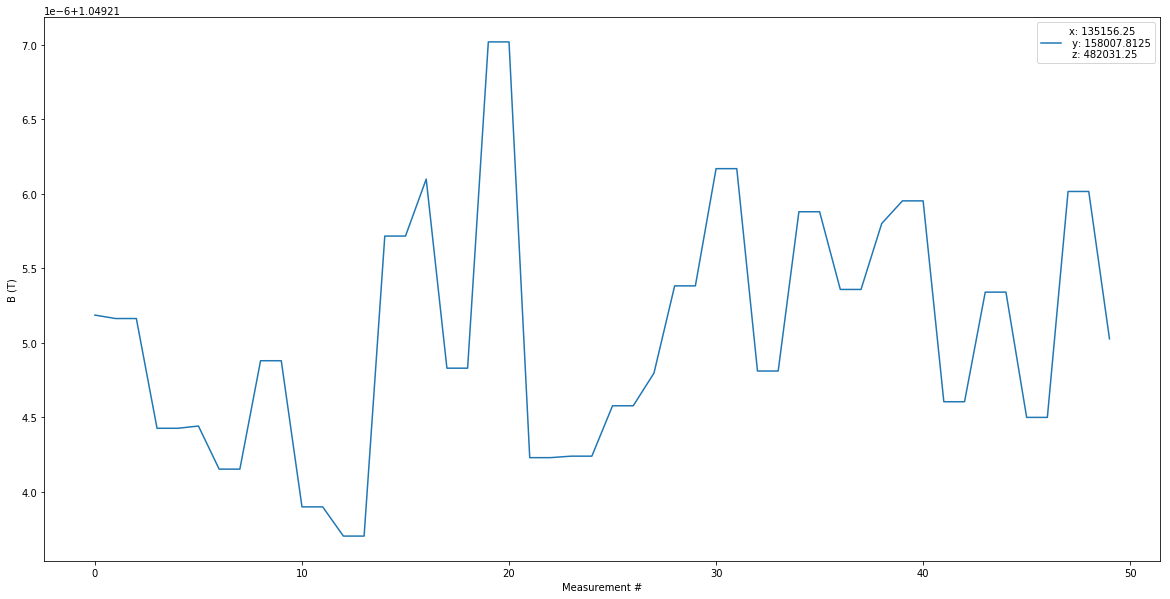

In [151]:
# plot a some random NMR_B to see general behavior
for i in range(10):
    sample = df.sample(n=1)
    x = float(sample.X_ZAB)
    y = float(sample.Y_ZAB)
    z = float(sample.Z_ZAB)
    f = plt.figure()
    _ = plt.plot(np.array(sample.NMR_B)[0],label=f"x: {x}\n y: {y}\n z: {z}")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xlabel("Measurement #")
    plt.ylabel("B (T)")
    plt.legend()
    f.savefig(f'/home/ckampa/Coding/hallprobecalib_extras/plots/nmr_b_{i}.pdf', bbox_inches='tight')

In [ ]:
# calculate the range of the B samples at a given grid point, find index of minimum range
df["NMR_RANGE"] = pd.Series([abs(row.NMR_B.max()-row.NMR_B.min()) for row in df.itertuples()])
imin = df["NMR_RANGE"].idxmin()
imin

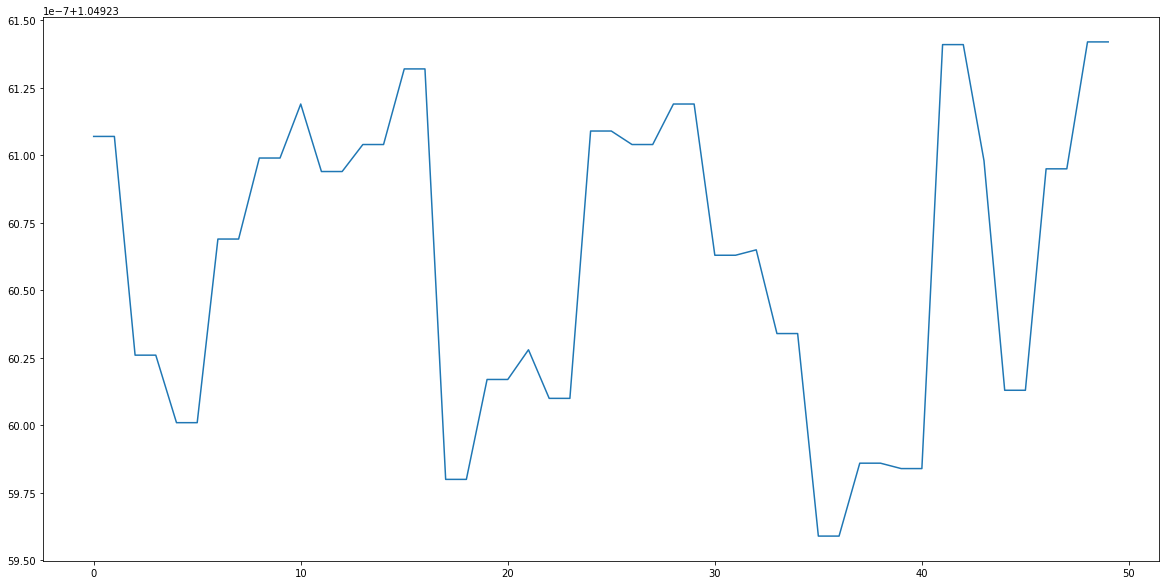

In [90]:
# plot NMR_B !
_ = plt.plot(df["NMR_B"][imin])

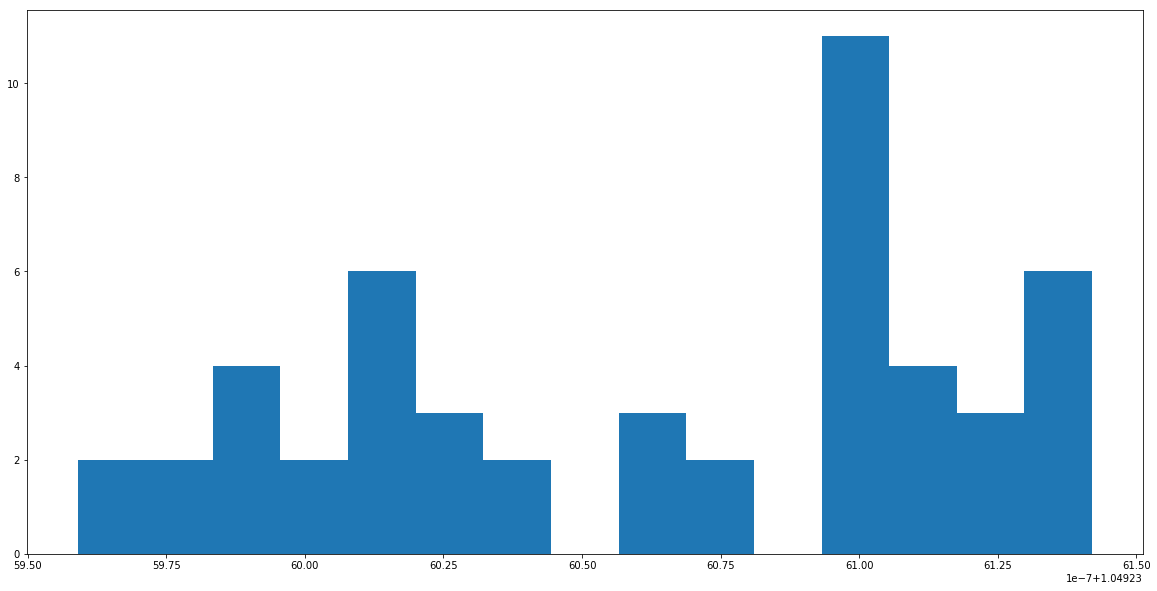

In [28]:
# project on y
_ = plt.hist(df["NMR_B"][imin],bins=15)

We see roughly this 2 peaked behavior, but the statistics are very limited. Instead, lets see what happens when we histogram samples from all measurements.

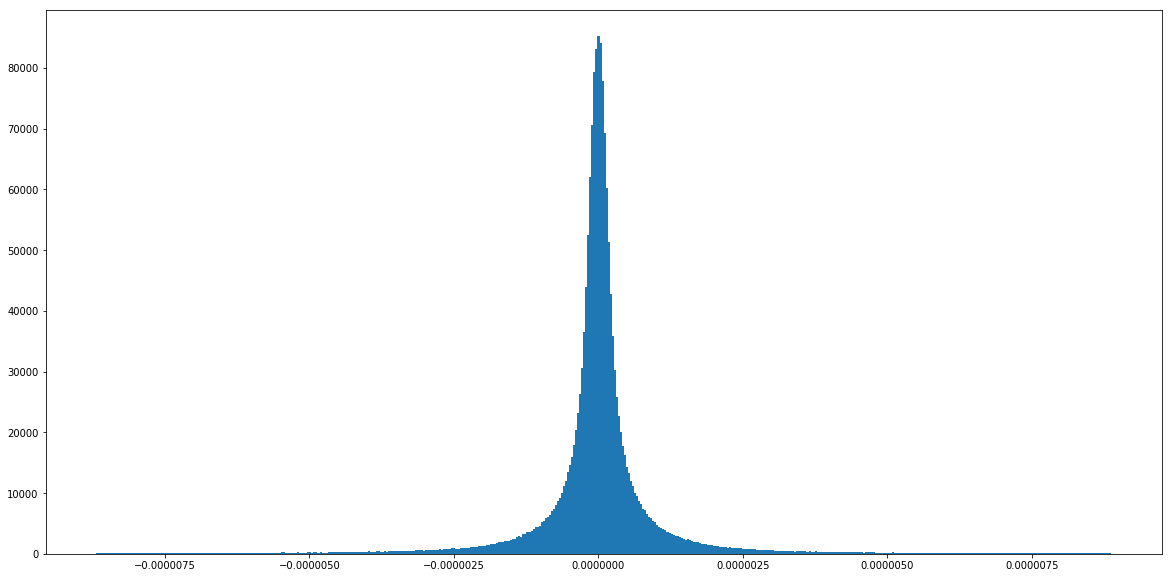

In [42]:
# concat all np.arrays of NMR_B data ... shifting average value to 0
nmrb = np.concatenate([row.NMR_B-row.NMR_B.mean() for row in df.itertuples()])
#_ = plt.hist(nmrb,bins=500)
_ = plt.hist(nmrb,bins=500,range=list(np.percentile(nmrb,[1,99])))

Single peak. Maybe the behavior is only present for small ranges. Let's make a cut on the data, say the lowest 15% of ranges.

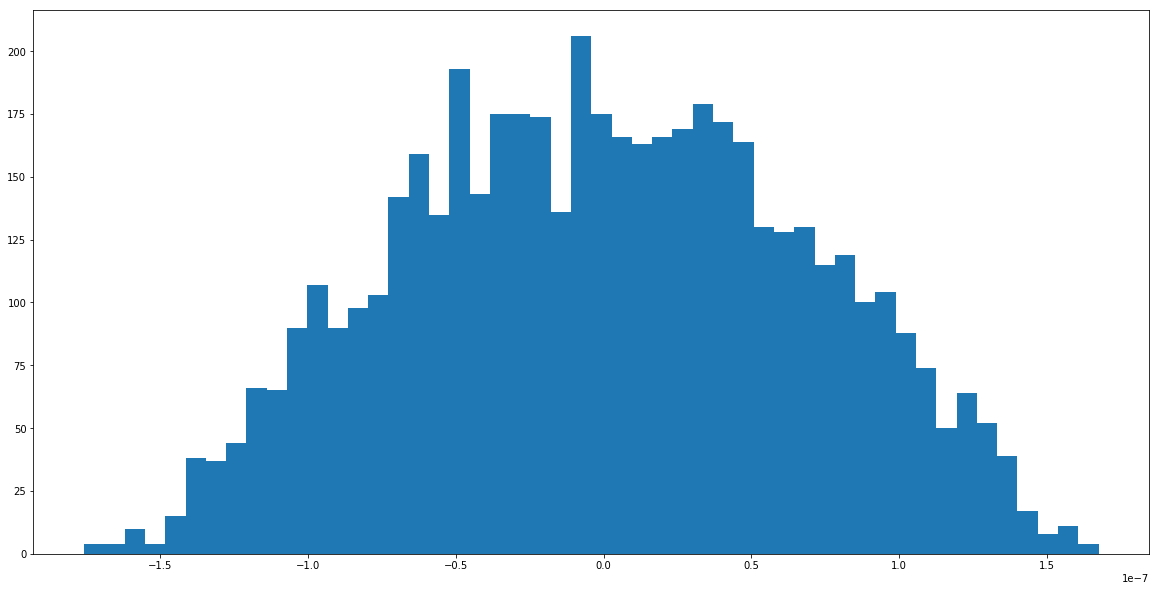

In [67]:
r_cut = df.NMR_RANGE < df.NMR_RANGE.quantile(100/len(df))
nmrb = np.concatenate([row.NMR_B-row.NMR_B.mean() for row in df[r_cut].itertuples()])
_ = plt.hist(nmrb,bins=50)

In [131]:
df.NMR_B_AVG.mean()
5*df.NMR_B_AVG.mean()/1e6

5.245954654280773e-06

In [132]:
print(f"Range--min: {df.NMR_RANGE.min()}, max: {df.NMR_RANGE.max()}, mean: {df.NMR_RANGE.mean()}, stdev: {df.NMR_RANGE.std()}")


Range--min: 1.8300000004245476e-07, max: 0.00021148199999987405, mean: 5.356184668989622e-06, stdev: 1.2763916239271526e-05


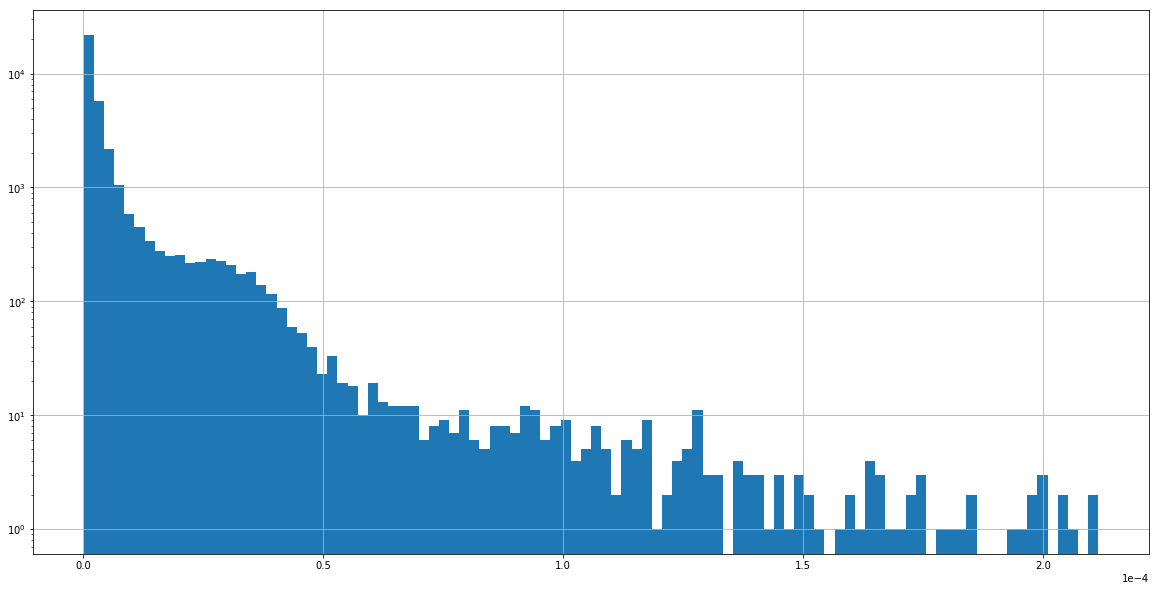

In [136]:
_ = df.NMR_RANGE.hist(bins=100)
plt.yscale('log')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [138]:
df["NMR_RANGE",df > 1e-4].count()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()